In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
## checking CUDA availability
torch.cuda.is_available()

True

In [4]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [5]:
transform = transforms.ToTensor()

batch_size = 8

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)

classes = ['T-shirt/top', 'Trouser/pants', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_iter = iter(trainset)

image, label = next(train_iter)

[image.shape, label]

[torch.Size([1, 28, 28]), 9]

In [7]:
torch.min(image).item(), torch.max(image).item()

(0.0, 1.0)

Ankle boot


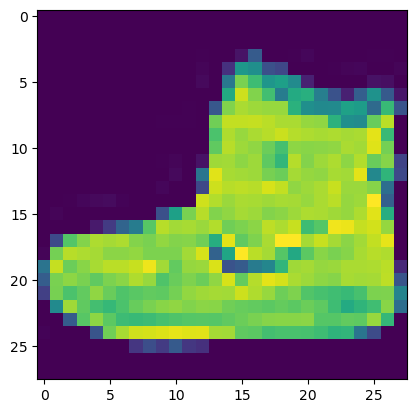

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np_img = image.numpy()
print(classes[label])
plt.imshow(np_img.reshape((28,28,1)))
plt.show()

In [9]:
np_img

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [10]:
trianset, valset = torch.utils.data.random_split(trainset, [50000, 10000])
len(trainset), len(valset), len(testset)

(60000, 10000, 10000)

In [11]:
print(f"Number of batches in the training set: {int(50000 / batch_size)}")
print(f"Number of batches in the validation set: {int(10000 / batch_size)}")

Number of batches in the training set: 6250
Number of batches in the validation set: 1250


In [12]:
type(trainset)

torchvision.datasets.mnist.FashionMNIST

In [13]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2,2)

        self.conv2 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=2)
        self.pool3 = nn.MaxPool2d(2,2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features=4096, out_features=1024)
        self.drop1 = nn.Dropout(p=0.3)

        self.fc2 = nn.Linear(in_features=1024, out_features=1024)
        self.drop2 = nn.Dropout(p=0.3)

        self.out = nn.Linear(in_features=1024, out_features=10)

    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool1(x)

        x=F.relu(self.conv2(x))
        x=self.pool2(x)

        x=F.relu(self.conv3(x))
        x=self.pool3(x)

        x=self.flatten(x)

        x=F.relu(self.fc1(x))
        x=self.drop1(x)

        x=F.relu(self.fc2(x))
        x=self.drop2(x)

        x=self.out(x)

        return x

In [15]:
net= NeuralNet()
net.to(device)

NeuralNet(
  (conv1): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(512, 1024, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (drop1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (drop2): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=1024, out_features=10, bias=True)
)

In [16]:
for i, data in enumerate(trainloader):
    inputs, labels = data[0].to(device), data[1].to(device)
    print(f"input shape: {inputs.shape}")
    print(f"after network reshape: {net(inputs).shape}")
    break

input shape: torch.Size([8, 1, 28, 28])
after network reshape: torch.Size([8, 10])


In [17]:
num_params = 0

for x in net.parameters():
    num_params+=len(torch.flatten(x))

print(f"Number of parameters in the model: {num_params:,}")

Number of parameters in the model: 8,536,074


In [18]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(), lr=0.001)

In [19]:
def train_one_epoch():
    net.train(True)

    running_loss = 0.0
    running_accuracy = 0.0

    for batch_idx, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs) # shape: [batch_size, 10]
        correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
        running_accuracy += correct/batch_size

        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        if batch_idx % 500 == 499: # print every 500 batches
            avg_loss_across_batches = running_loss / 500
            avg_acc_across_batches = (running_accuracy / 500) * 100
            print("Batch {0}, Loss: {1:.3f}, Accuracy: {2: .1f}%".format(batch_idx+1,
                                                                         avg_loss_across_batches,
                                                                         avg_acc_across_batches))
            
            running_loss = 0.0
            running_accuracy = 0.0

print()

In [20]:
def validate_one_epoch():
    net.train(False)

    running_loss = 0.0
    running_accuracy = 0.0

    for i, data in enumerate(valloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        with torch.no_grad():
            outputs = net(inputs) # shape: [batch_size, 10]
            correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
            running_accuracy += correct / batch_size
            loss = criterion(outputs, labels) # One number, the average batch loss
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(valloader)
    avg_acc_across_batches = (running_accuracy / len(valloader)) * 100

    print("Val loss: {0: .3f}, Val Accuracy: {1: .1f}%".format(avg_loss_across_batches,
                                                               avg_acc_across_batches))
    
    print(50*'*')
    print()

In [ ]:
num_epochs = 10

for epoch_index in range(num_epochs):
    print(f"Epochs: {epoch_index + 1} \n")

    train_one_epoch()
    validate_one_epoch()

print('Finished Training')